In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
df_drugs = pd.read_csv("drugs.csv")
df_drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
# Objeto LabelEncoder y diccionario con las caracteristicas para la documentacion.
le = preprocessing.LabelEncoder()
mapeoCaracteristicas= {}
mapeoCaracteristicaDrug={}

In [5]:
# Etiquetar las columnas y guardar los mapeos
for columna in ['BP', 'Sex', 'Cholesterol']:
    df_drugs[columna] = le.fit_transform(df_drugs[columna])
    mapeoCaracteristicas[columna] = dict(zip(le.classes_, le.transform(le.classes_)))

mapeoCaracteristicas

{'BP': {'HIGH': 0, 'LOW': 1, 'NORMAL': 2},
 'Sex': {'F': 0, 'M': 1},
 'Cholesterol': {'HIGH': 0, 'NORMAL': 1}}

In [6]:
x_ind=df_drugs.drop("Drug", axis=1)
y_dep=df_drugs["Drug"]

In [7]:
x_ind.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [8]:
y_dep.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## Comparacion entre modelos

In [9]:
y_dep_cod= le.fit_transform(y_dep)
mapeoCaracteristicaDrug = dict(zip(le.classes_, le.transform(le.classes_)))

x_train, x_test, y_train, y_test = train_test_split(x_ind, y_dep, test_size=0.3, random_state=3)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_ind, y_dep_cod, test_size=0.3, random_state=3)

# Clasificador usando la impureza de Gini
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(x_train, y_train)

# Clasificador usando la ganancia de información
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(x_train, y_train)

# Regresor usando el error cuadrático medio
reg_mse = DecisionTreeRegressor(criterion='squared_error')
reg_mse.fit(x_train2, y_train2)

# Regresor usando Friedman MSE
reg_friedman_mse = DecisionTreeRegressor(criterion='friedman_mse')
reg_friedman_mse.fit(x_train2, y_train2)


# Hacer predicciones y evaluar el modelo con Gini
y_pred_gini = clf_gini.predict(x_test)
print("Evaluación con Impureza de Gini")
print(classification_report(y_test, y_pred_gini))

cm_gini= confusion_matrix(y_test, y_pred_gini)
print(cm_gini)

# Hacer predicciones y evaluar el modelo con Entropy
y_pred_entropy = clf_entropy.predict(x_test)
print("\nEvaluación con Ganancia de Información")
print(classification_report(y_test, y_pred_entropy))

cm_entropy= confusion_matrix(y_test, y_pred_entropy)
print(cm_entropy)

print()

# Hacer predicciones y evaluar el modelo con MSE
y_pred_mse = reg_mse.predict(x_test2)
print("Evaluación con MSE")
print(f"MSE: {mean_squared_error(y_test2, y_pred_mse)}")
print(f"R^2: {r2_score(y_test2, y_pred_mse)}")

# Hacer predicciones y evaluar el modelo con Friedman MSE
y_pred_friedman_mse = reg_friedman_mse.predict(x_test2)
print("\nEvaluación con Friedman MSE")
print(f"MSE: {mean_squared_error(y_test2, y_pred_friedman_mse)}")
print(f"R^2: {r2_score(y_test2, y_pred_friedman_mse)}")


Evaluación con Impureza de Gini
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60

[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 20  1]
 [ 0  0  0  0 22]]

Evaluación con Ganancia de Información
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

    accuracy          

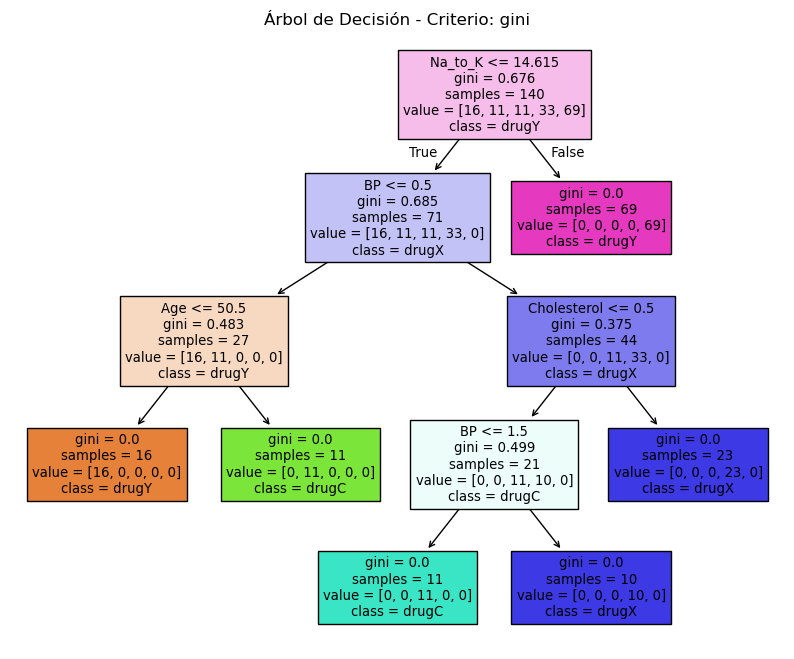

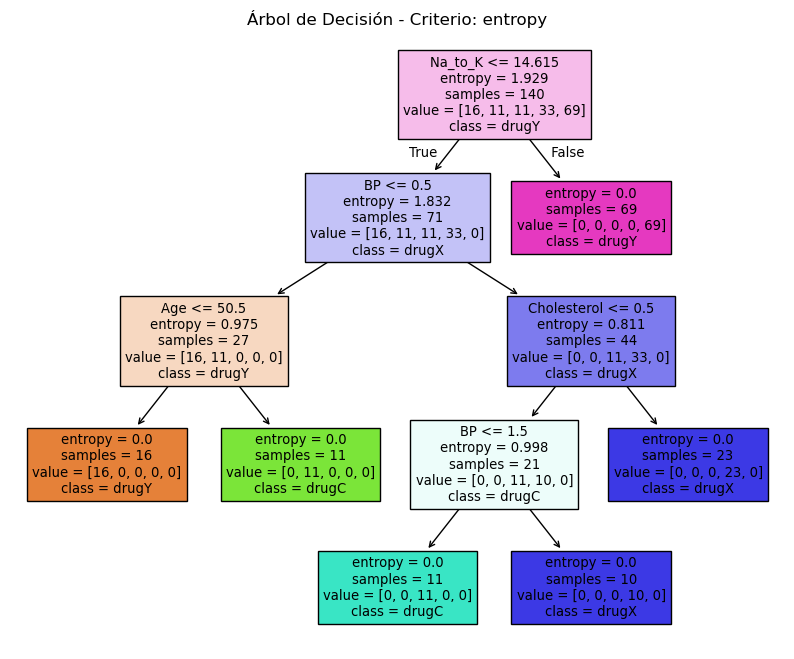

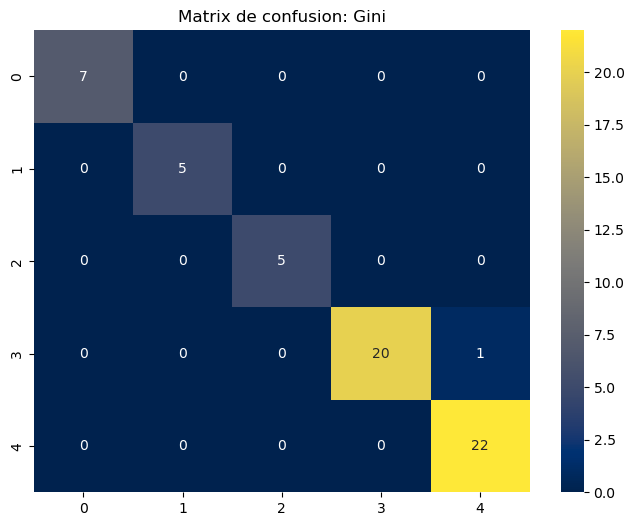

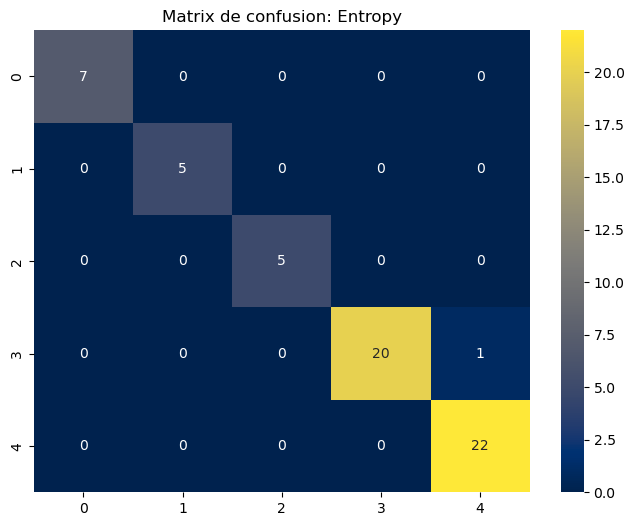

In [10]:
from sklearn import tree
import seaborn as sns


for clasificador in [clf_gini, clf_entropy]:

    criterio = clasificador.criterion
    titulo = f"Árbol de Decisión - Criterio: {criterio}"
    
    plt.figure(figsize= (10,8))
    tree.plot_tree(clasificador, feature_names=x_ind.columns, class_names = y_dep, filled=True)
    plt.title(titulo)  # Agregar el título
    
    plt.show()


matrices = [cm_gini, cm_entropy]
nombres = ["Gini", "Entropy"]

zipped = list(zip(matrices, nombres))

for cm, nombre in zipped:
    plt.figure(figsize=(8, 6))
    titulo = f"Matrix de confusion: {nombre}"
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', cbar=True)
    plt.title(titulo)  # Agregar el título


In [11]:
from sklearn.model_selection import GridSearchCV

GridParametros= {'max_depth': range(1, 21)}

# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search_gini = GridSearchCV(clf_gini, GridParametros, cv=5, scoring='accuracy')
grid_search_entropy = GridSearchCV(clf_entropy, GridParametros, cv=5, scoring='accuracy')

# Ajustar el modelo con los datos de entrenamiento
grid_search_gini.fit(x_train, y_train)
grid_search_entropy.fit(x_train, y_train)

# Obtener los mejores hiperparámetros y el mejor rendimiento
best_params_gini = grid_search_gini.best_params_
best_score_gini = grid_search_gini.best_score_

best_params_entropy = grid_search_entropy.best_params_
best_score_entropy = grid_search_entropy.best_score_

print(f"Mejor profundidad del árbol gini: {best_params_gini['max_depth']}")
print(f"Mejor precisión en validación cruzada: {best_score_gini}")
print()
print(f"Mejor profundidad del árbol entropy: {best_params_entropy['max_depth']}")
print(f"Mejor precisión en validación cruzada: {best_score_entropy}")

Mejor profundidad del árbol gini: 4
Mejor precisión en validación cruzada: 0.9928571428571429

Mejor profundidad del árbol entropy: 4
Mejor precisión en validación cruzada: 0.9928571428571429


#### Al observar la precisión y profundidad, son exactamente la misma, entoncces no ha de haber cambios si utilizamos cualquiera de los dos modelos

In [26]:
mapeoCaracteristicas

{'BP': {'HIGH': 0, 'LOW': 1, 'NORMAL': 2},
 'Sex': {'F': 0, 'M': 1},
 'Cholesterol': {'HIGH': 0, 'NORMAL': 1}}

## Caso de prueba

In [37]:
edad = 50
sexo = mapeoCaracteristicas['Sex']['F']
presion = mapeoCaracteristicas['BP']['HIGH']
colesterol = mapeoCaracteristicas['Cholesterol']['NORMAL']
Na_to_K = 15.302

valores_mapeados = pd.DataFrame([[edad, sexo, presion, colesterol, Na_to_K]], columns=x_train.columns)

In [38]:
clf_gini_tuneada= DecisionTreeClassifier(max_depth=4, criterion='gini')
clf_gini_tuneada.fit(x_train, y_train)

y_pred_prueba=clf_gini_tuneada.predict(valores_mapeados)
print(y_pred_prueba)

['drugY']


La droga recomendad de acuerdo al arbol de decision de Gini es drugY, no se porfundizara en los arboles de calisifcación con tecnica de regresión ya que esto es un trabajo para otra sesión.